# part 1

In [2]:
import random

def roulette_simulation (N):
    total = 0
    outcomes = ['red'] * 9 + ['black'] * 9 + ['green'] * 1
    
    for _ in range(N):
        result = random.choice(outcomes)
        
        if result == 'black':
            total += 1
        else:
            total -= 1
            
    return total 

# part 2

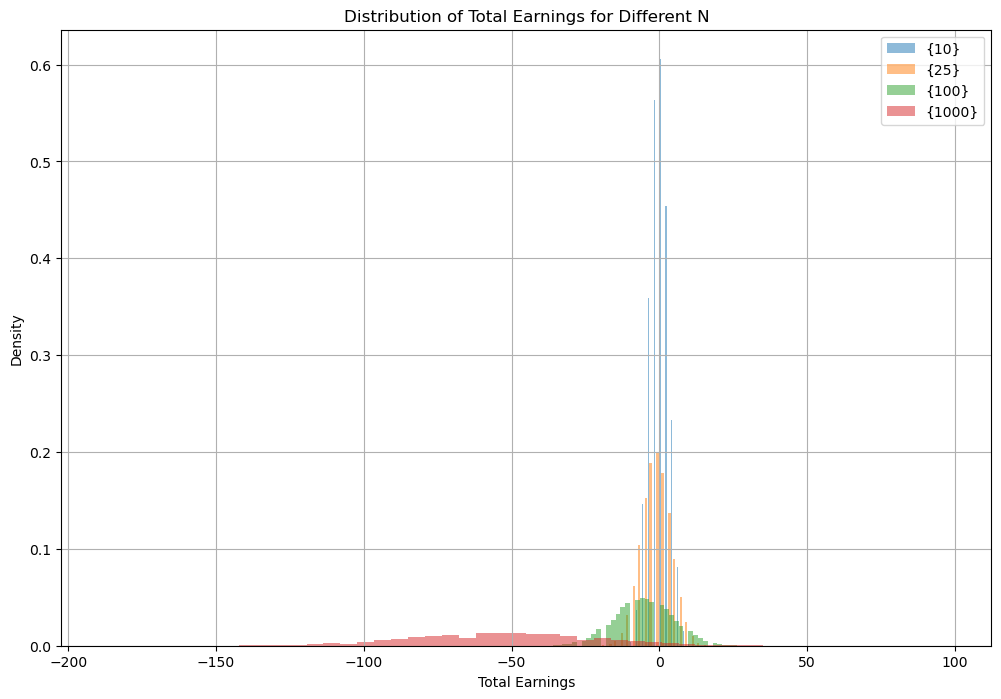

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

def monte_carlo_simulation(N, simulations=100000):
    results = [roulette_simulation(N) for _ in range(simulations)]
    return results

N_values = [10, 25, 100, 1000]
simulation_results = {}
for N in N_values:
    simulation_results[N] = monte_carlo_simulation(N)

plt.figure(figsize=(12, 8))
for N in N_values:
    plt.hist(simulation_results[N], bins=50, alpha=0.5, label={N}, density=True)

plt.title('Distribution of Total Earnings for Different N')
plt.xlabel('Total Earnings')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

# part 3

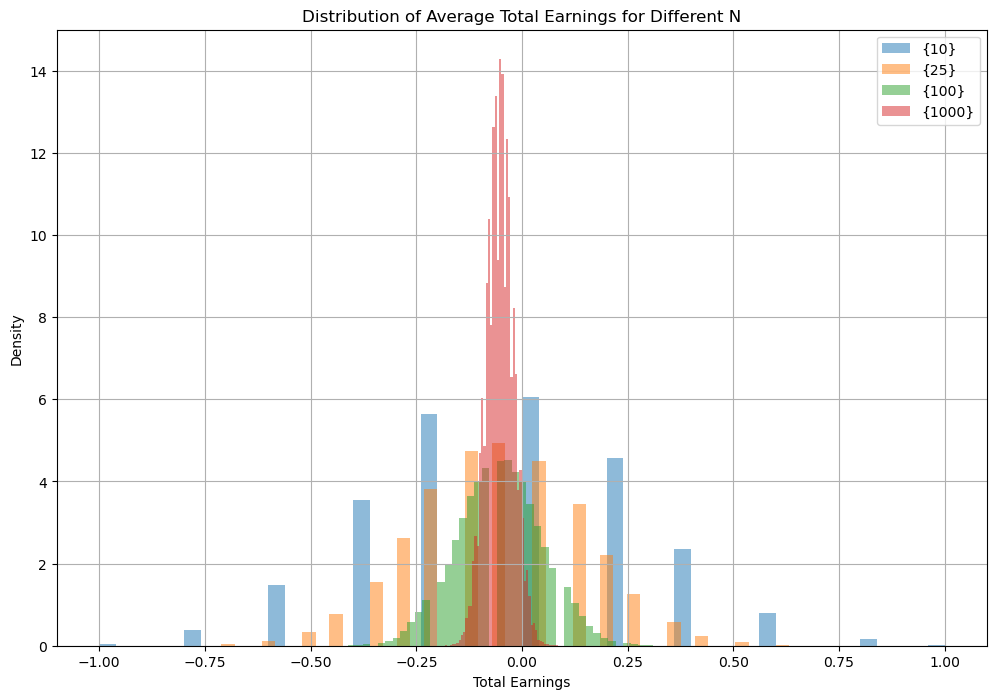

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

def monte_carlo_simulation(N, simulations=100000):
    results = [roulette_simulation(N)/N for _ in range(simulations)]
    return results

N_values = [10, 25, 100, 1000]
simulation_results = {}
for N in N_values:
    simulation_results[N] = monte_carlo_simulation(N)

plt.figure(figsize=(12, 8))
for N in N_values:
    plt.hist(simulation_results[N], bins=50, alpha=0.5, label={N}, density=True)

plt.title('Distribution of Average Total Earnings for Different N')
plt.xlabel('Total Earnings')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

by dividing to N expected values are almost the same, and standard errors gets smaller by increasing sample number contrary to previous plot.

# part 4

In [9]:
import numpy as np

N_values = [10, 25, 100, 1000]
def calculate_theoretical(N):
    expected_value = (18/38) * 1 + (20/38) * (-1) 
    theoretical_mean = N * expected_value
    variance = N * ((18 / 38) * (1 - expected_value) ** 2 + (20 / 38) * (-1 - expected_value) ** 2)
    standard_error = np.sqrt(variance)
    return expected_value, standard_error

theoretical_values = {}
for N in N_values:
    theoretical_values[N] = calculate_theoretical(N)
theoretical_values    

{10: (-0.05263157894736842, 3.1578947368421053),
 25: (-0.05263157894736842, 4.9930699897395465),
 100: (-0.05263157894736842, 9.986139979479093),
 1000: (-0.05263157894736842, 31.57894736842105)}

In [16]:
simulation_values = {}
for N in N_values:
    simulation_values[N] = np.average(simulation_results[N]), N*np.std(simulation_results[N])
simulation_values        

{10: (-0.05237, 3.165314883230419),
 25: (-0.053031999999999996, 4.982450637989302),
 100: (-0.05253500000000001, 10.024010063342912),
 1000: (-0.05279938, 31.772511257620163)}

expected values and standard errors are almost the same.

# part 5

In [21]:
from scipy.stats import norm
def casino_loses_CLT(m , std):
    gain = norm.cdf(x=0, loc=m, scale=std)
    return 1-gain
    
def casino_loses_monte(N, simulations=100000):
    results = monte_carlo_simulation(N, simulations)
    return np.mean(np.array(results) < 0)

N = 25
m , std = theoretical_values[N]
casino_loses_CLT(m , std)

0.4957948570031291

In [22]:
casino_loses_monte(N)

0.6029

there is a little difference. 10 percent!!

# part 6

In [ ]:
N_values = list(i for i in range(25, 1001, 25))
losing_prob = []
for N in N_values:
    losing_prob.append(casino_loses_monte(N))

plt.figure(figsize=(12, 8))
for N in N_values:
    plt.plot(N_values, losing_prob)

plt.title('Casino Losing for Different N')
plt.xlabel('N Round')
plt.ylabel('Losing Probability')
plt.draw()
plt.show()